In [1]:
import random

import networkx as nx
import numpy as np
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

# from tspqaoa.optimization import get_optimized_angles
# from tspqaoa.qaoa import get_tsp_qaoa_circuit


In [2]:
from all_utils_trial import *

In [3]:
# build graph
G = nx.complete_graph(4)
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.random()

pen = G.number_of_nodes()*10

x0 = np.ones(2) # p is inferred from len(x0)
x = get_optimized_angles(G, x0, pen)

angles : [1. 1.]


100%|██████████| 76/76 [00:00<00:00, 28704.83it/s]


angles : [2. 1.]


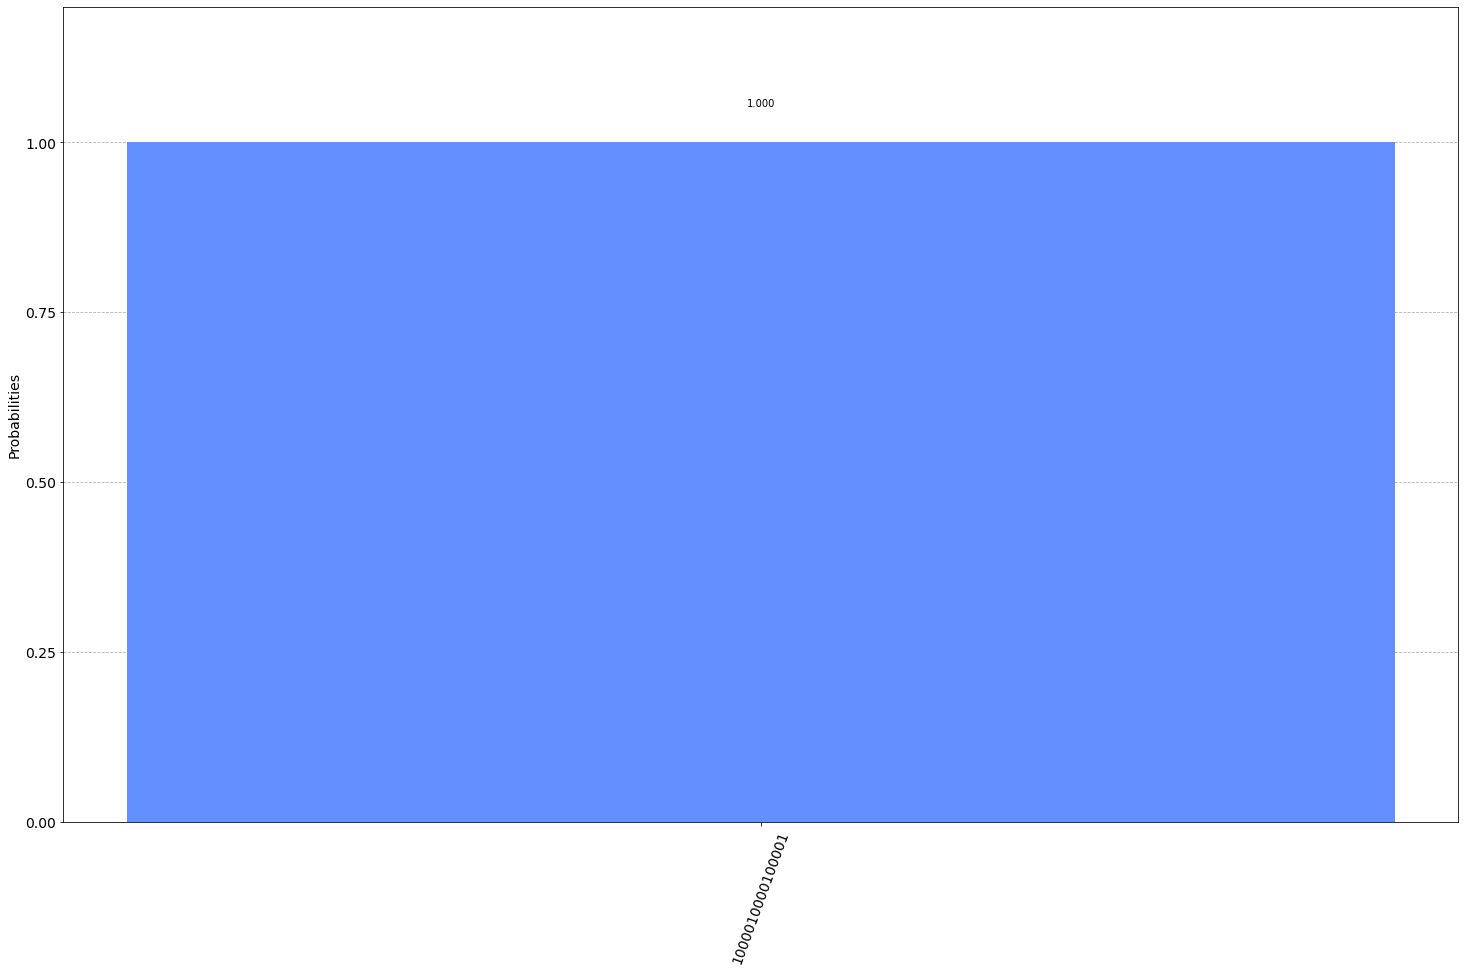

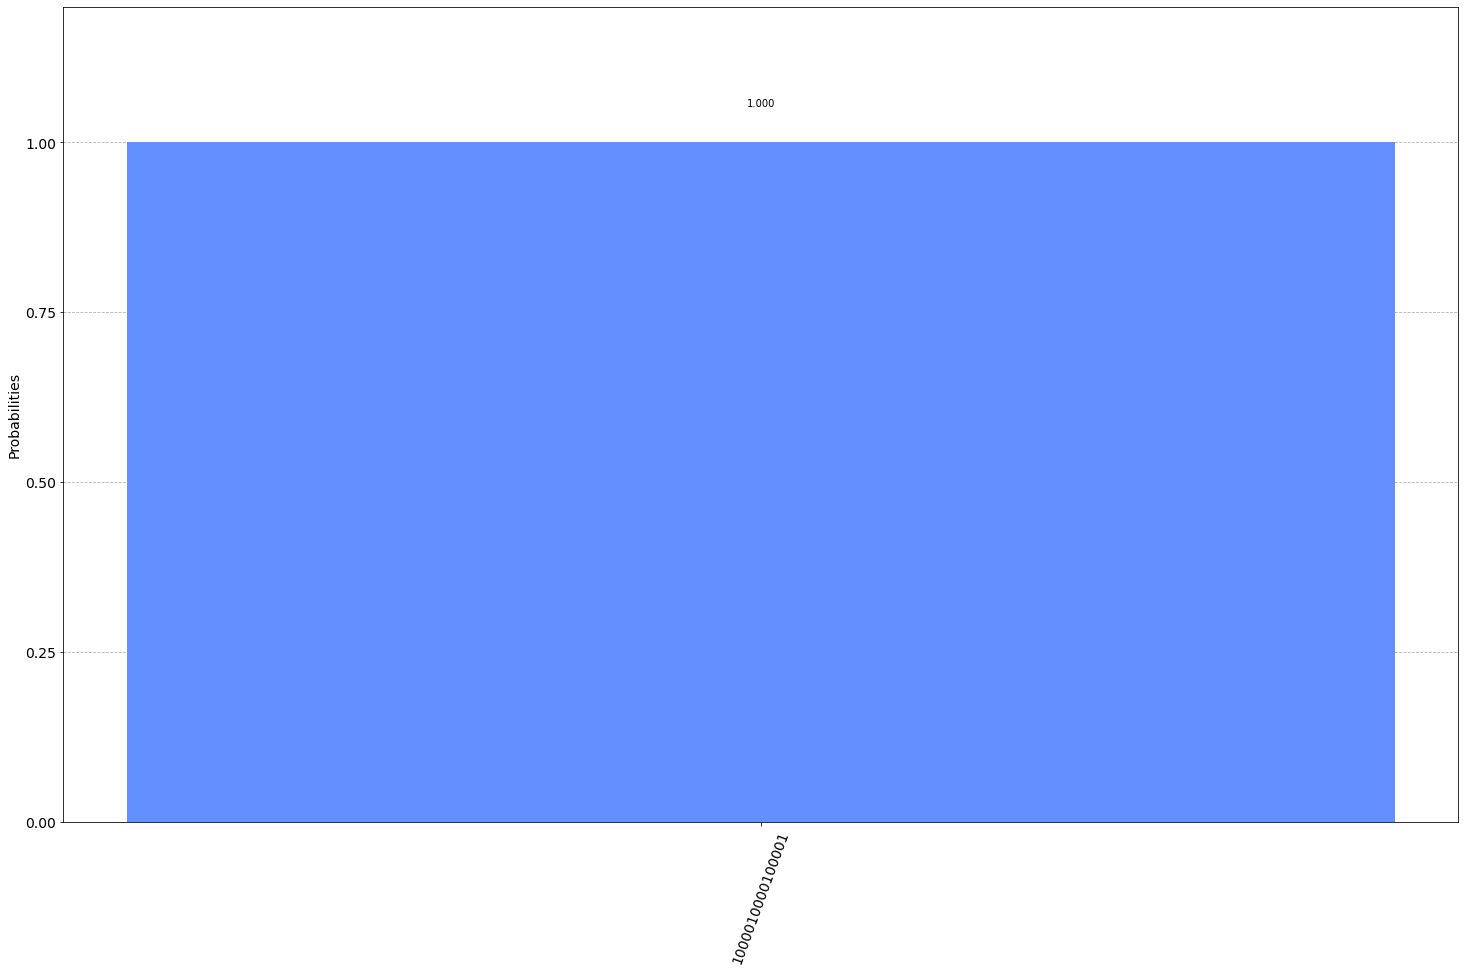

In [3]:
x = x['x']
p=len(x)
beta = x[0:int(p/2)]
gamma = x[int(p/2):p]
qc = get_tsp_qaoa_circuit(G, beta, gamma, pen=5, T1=1, T2=1)
qc.measure_all()
backend = AerSimulator()
plot_histogram(backend.run(qc).result().get_counts(), figsize=(25,15))